In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import os
try:
    os.chdir('workspace')
except:
    pass

In [14]:
df = pd.read_csv("original/ecg.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


Text(0.5, 1.0, '1.0')

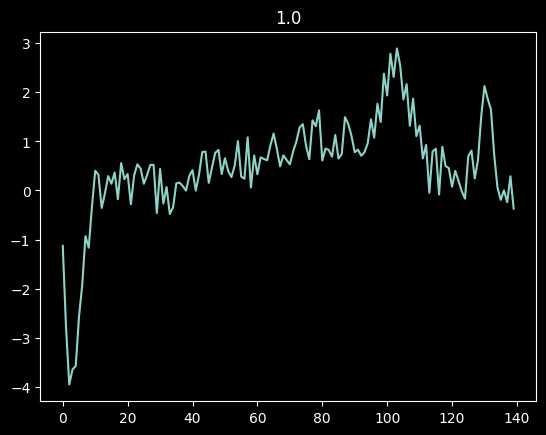

In [15]:
id = 3000
signal, label = df.iloc[id, :-1], df.iloc[id, -1]

signal = signal+np.random.random(signal.shape)*1
plt.plot(signal)
plt.title(label)

# ECG

### Dataset

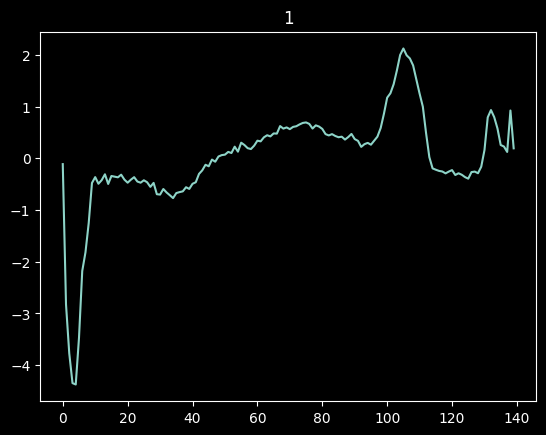

In [19]:
import torch

## INIT
idx = 0

signal, label = df.iloc[idx, :-1], df.iloc[idx, -1]
signal = torch.as_tensor(signal)
label = torch.as_tensor(label)
X = signal.view(1,140).float()
y = label.long()

plt.title(y.item())
plt.plot(X[0])

### Model

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.fft import fft, ifft

in_channels, out_channels, kernel_size, pct = 1, 4, 32, 0.3

## INIT
freqs = nn.Parameter(torch.randn(out_channels, in_channels, kernel_size, dtype=torch.complex64))
bias = nn.Parameter(torch.randn(out_channels))
masks = nn.Parameter(torch.zeros_like(freqs, dtype=bool), requires_grad=False)
masks[:, :, :int(pct*masks.shape[2])] = True
freqs.data *= masks

## Forward
freqs = freqs * masks
weights = ifft(freqs).real
out = F.conv1d(X, weights) + bias.view(1, -1, 1)
out = F.relu(out)

weights.shape

torch.Size([4, 1, 32])